In [31]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

def readJSON(path):
    df = pd.DataFrame()
    with open(path, 'r') as file:
        for line in file:
            line_df = pd.read_json(line, lines=True)
            df = pd.concat([df, line_df], ignore_index=True)
    return df

train = readJSON('/kaggle/input/araieval/araieval/araieval_arabicnlp24-main-task1/araieval_arabicnlp24-main-task1/task1/data/araieval24_task1_train.jsonl')
dev = readJSON('/kaggle/input/araieval/araieval/araieval_arabicnlp24-main-task1/araieval_arabicnlp24-main-task1/task1/data/araieval24_task1_dev.jsonl')

In [32]:
len(train)

6997

In [33]:
train.head(5)

,id,text,labels,type
0,7365,تحذيرات من حرب جديدة في حال فشل الانتخابات الق...,"[{'start': 0, 'end': 50, 'technique': 'Appeal_...",tweet
1,1400135121001488384,رب اجعل صباحي هذا غائم بلطفك، لا شر فيه ولا وق...,[],tweet
2,1175652922845216768,#عين_اليمن #26سبتمبر ثورة شعب صنعت تاريخة احتف...,"[{'start': 78, 'end': 89, 'technique': 'Name_C...",tweet
3,1270585163752316928,الحرب على #سورية | حملات تظليل مستمرة .. لمحاو...,"[{'start': 25, 'end': 30, 'technique': 'Loaded...",tweet
4,1395508740703535104,"📣 New Podcast! ""مزيج الخبرة والشباب.. خلطة سحر...","[{'start': 39, 'end': 50, 'technique': 'Name_C...",tweet


In [34]:
train['labels'].iloc[0]

[{'start': 0,
  'end': 50,
  'technique': 'Appeal_to_Fear-Prejudice',
  'text': 'تحذيرات من حرب جديدة في حال فشل الانتخابات القادمة'},
 {'start': 11, 'end': 14, 'technique': 'Loaded_Language', 'text': 'حرب'}]

In [35]:
train['type'].value_counts()

type
paragraph    6002
tweet         995
Name: count, dtype: int64

In [36]:
len(dev)

921

In [37]:
dev['type'].value_counts()

type
paragraph    672
tweet        249
Name: count, dtype: int64

In [38]:
import matplotlib.pyplot as plt

def technique_dist(df):
    # Checking for presence of techniques and counting
    df['has_technique'] = df['labels'].apply(lambda x: len(x) > 0)

    # Counting rows with and without techniques for pie chart
    technique_counts = df['has_technique'].value_counts()

    # Extracting all techniques and counting for bar chart
    all_techniques = [technique['technique'] for sublist in df['labels'] for technique in sublist]
    technique_series = pd.Series(all_techniques)
    technique_frequencies = technique_series.value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(technique_counts, labels=['Has Techniques', 'No Techniques'], autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Rows With and Without Techniques')
    plt.show()

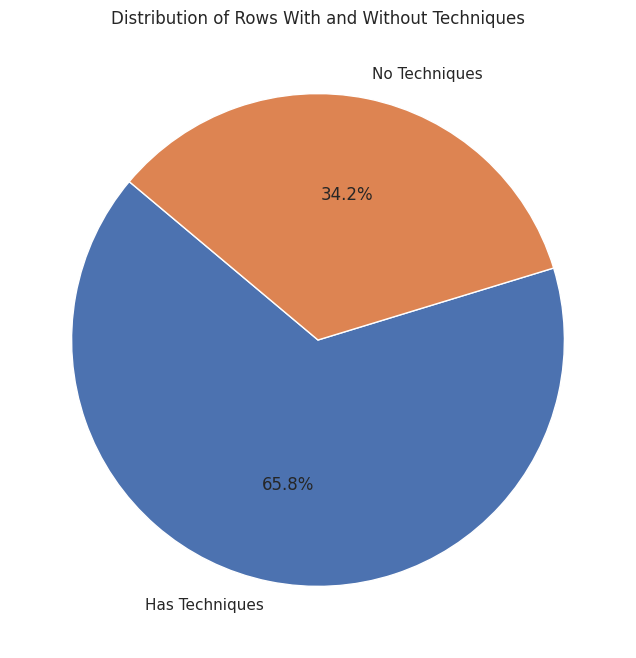

In [39]:
technique_dist(train)

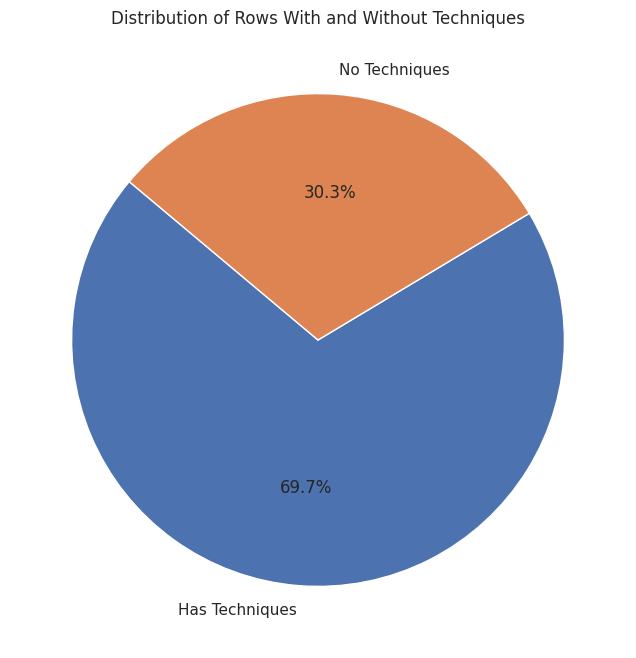

In [40]:
technique_dist(dev)

In [41]:
def type_comparison_hist(df):
    # Calculate the length of each text
    df['text_length'] = df['text'].apply(len)

    # Plotting histograms
    plt.figure(figsize=(12, 6))
    plt.hist(df[df['type'] == 'tweet']['text_length'], bins=20, alpha=0.5, label='Tweets')
    plt.hist(df[df['type'] == 'paragraph']['text_length'], bins=20, alpha=0.5, label='Paragraphs')
    plt.title('Distribution of Text Lengths by Type')
    plt.xlabel('Text Length (number of characters)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

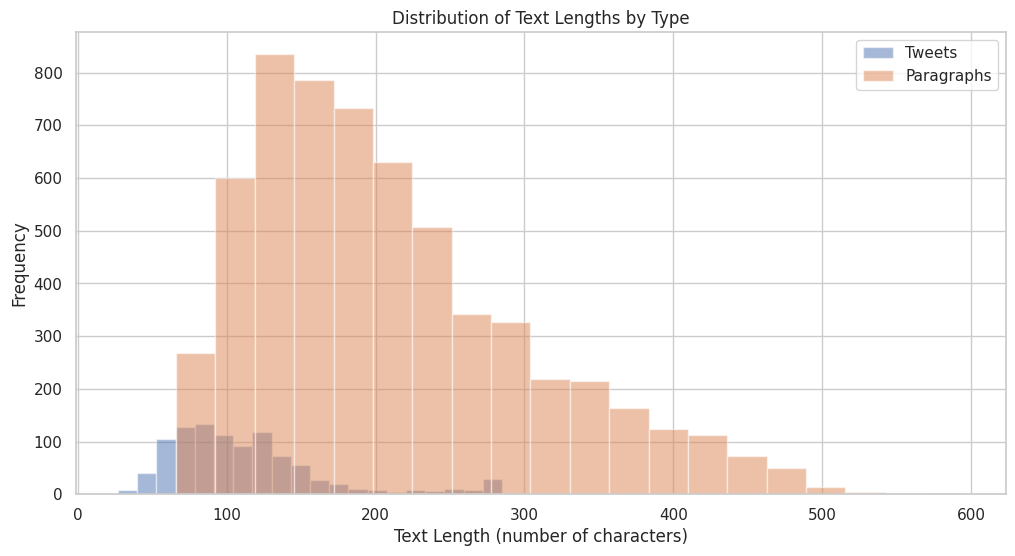

In [42]:
type_comparison_hist(train)

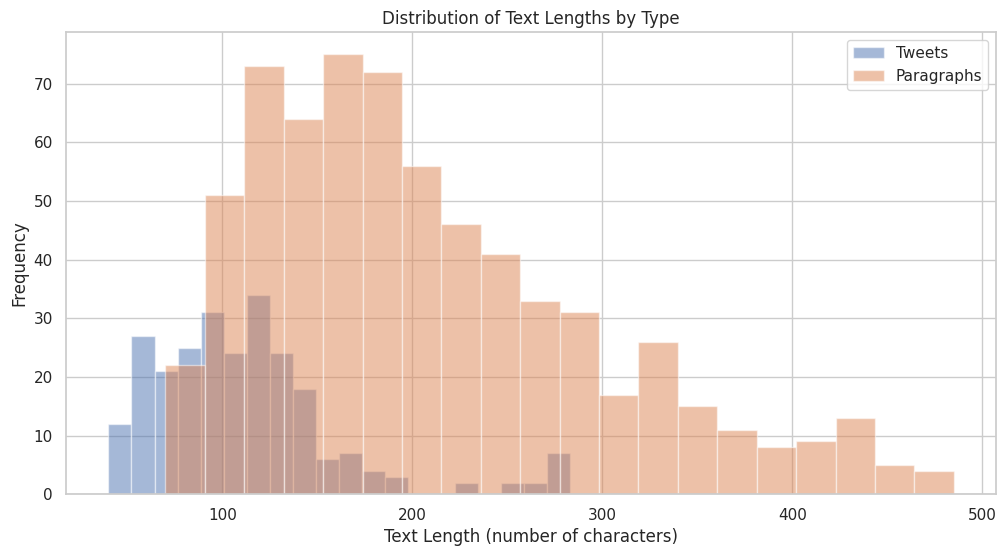

In [43]:
type_comparison_hist(dev)

In [44]:
import seaborn as sns

def type_density(df):
    # Set the style
    sns.set(style="whitegrid")

    # Create density plots
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df[df['type'] == 'tweet']['text_length'], shade=True, label='Tweets')
    sns.kdeplot(df[df['type'] == 'paragraph']['text_length'], shade=True, label='Paragraphs')
    plt.title('Density of Text Lengths by Type')
    plt.xlabel('Text Length (number of characters)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

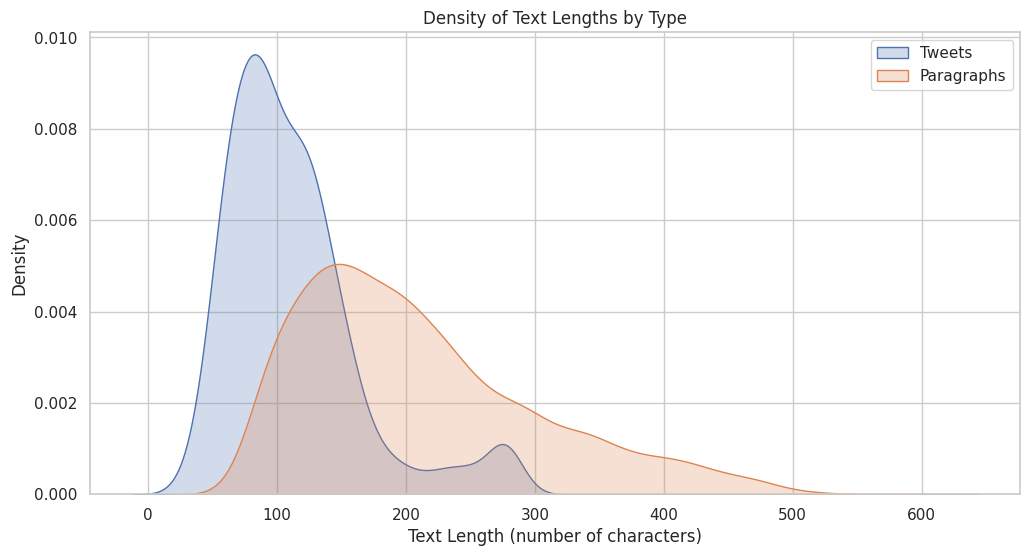

In [45]:
type_density(train)

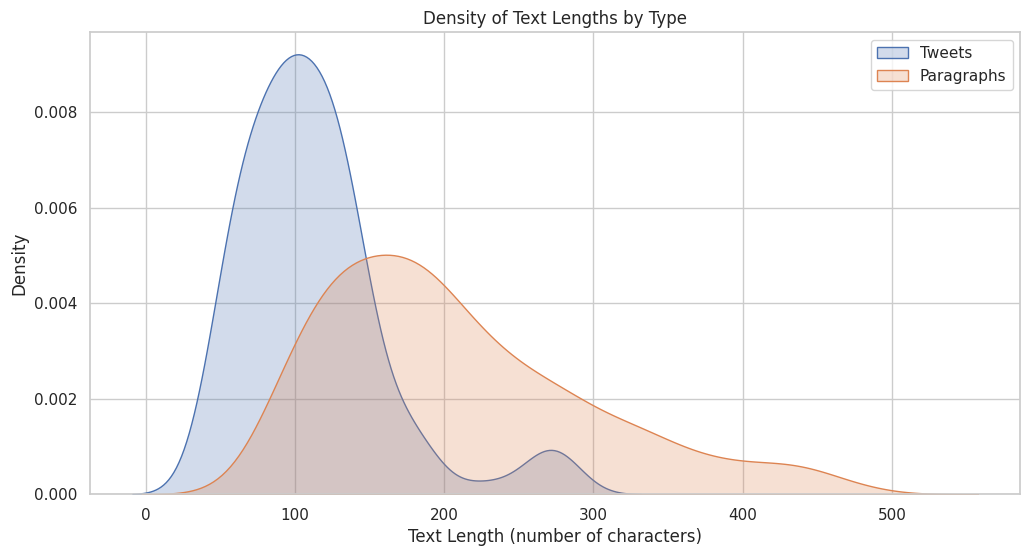

In [46]:
type_density(dev)

In [47]:
def calculate_non_arabic_word_percentage(df):
    # Regular expression for detecting Arabic characters
    arabic_re = re.compile(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDFF\uFE70-\uFEFF]+')

    # Helper function to determine if a word is non-Arabic
    def is_non_arabic_word(word):
        return arabic_re.search(word) is None

    # Count non-Arabic and total words
    total_words = 0
    non_arabic_words = 0
    
    for text in df['text']:
        # Split text into words
        words = text.split()
        total_words += len(words)
        # Count non-Arabic words
        non_arabic_words += sum(is_non_arabic_word(word) for word in words)

    # Calculate percentage of non-Arabic words
    non_arabic_percentage = 100 * non_arabic_words / total_words if total_words > 0 else 0
    
    return non_arabic_percentage

In [48]:
calculate_non_arabic_word_percentage(train)

2.4245423057892133

In [49]:
calculate_non_arabic_word_percentage(dev)

2.93896006028636

In [50]:
def count_total_emojis(df):
    # Unicode ranges for emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"  # Enclosed characters
                               "]+", flags=re.UNICODE)

    # Helper function to count emojis in a text
    def count_emojis(text):
        return len(emoji_pattern.findall(text))

    # Total emoji count
    emoji_count = 0
    
    for text in df['text']:
        # Count emojis in the entire text
        emoji_count += count_emojis(text)

    return emoji_count

In [51]:
count_total_emojis(train)

402

In [52]:
count_total_emojis(dev)

43

### BIO Encoding

In [53]:
def prepare_tag_token(df):
  new_df = pd.DataFrame()

  o_tag = "O"
  cnt = 0

  for index, rec in df.iterrows():
      ner_tags, ner_tokens = [], []

      text = rec['text']  # Access by column
#       if len(rec['labels']) == 0:
#           cnt += 1
#           continue

      ranges = []

      for r in rec['labels']:
          ranges.append((range(r["start"], r["end"] + 1), r["technique"]))

      tokens = text.split()
      token_ranges = []
      c = 0

      for i, token in enumerate(tokens):
          token_ranges.append((range(c, c + len(token)), token))
          c += len(token) + 1

      for token_range in token_ranges:
          is_found = False
          tag = None
          token = None

          for sub_range in ranges:
              if (token_range[0].start in sub_range[0] or token_range[0].stop - 1 in sub_range[0] or
                  (sub_range[0].start in token_range[0] and sub_range[0].stop - 1 in token_range[0])):
                tag = sub_range[1]
                token = token_range[1]
                is_found = True

          if not is_found:
              ner_tags.append(o_tag)
              ner_tokens.append(token_range[1])
          else:
              ner_tags.append(tag)
              ner_tokens.append(token)

      for i, tag in enumerate(ner_tags):
          if i == 0 and ner_tags[i] != o_tag:
              ner_tags[i] = f"B-{ner_tags[i]}"
          elif i > 0 and ner_tags[i] != o_tag:
              if ner_tags[i - 1].replace("B-", "").replace("I-", "") == ner_tags[i]:
                  ner_tags[i] = f"I-{ner_tags[i]}"
              else:
                  ner_tags[i] = f"B-{ner_tags[i]}"

      # Construct the new row dictionary
      new_row = rec.to_dict()
      new_row['tag'] = ner_tags
      new_row['token'] = ner_tokens

      # Append the new row to the new DataFrame
      new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)
      cnt += 1

  new_df = new_df.drop(['id', 'text', 'labels'], axis=1)
  return new_df

In [54]:
train = prepare_tag_token(train)
dev = prepare_tag_token(dev)
train.head()

,type,has_technique,text_length,tag,token
0,tweet,True,50,"[B-Appeal_to_Fear-Prejudice, I-Appeal_to_Fear-...","[تحذيرات, من, حرب, جديدة, في, حال, فشل, الانتخ..."
1,tweet,False,104,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[رب, اجعل, صباحي, هذا, غائم, بلطفك،, لا, شر, ف..."
2,tweet,True,103,"[O, O, B-Name_Calling-Labeling, I-Name_Calling...","[#عين_اليمن, #26سبتمبر, ثورة, شعب, صنعت, تاريخ..."
3,tweet,True,86,"[O, O, O, O, O, B-Loaded_Language, O, O, O, B-...","[الحرب, على, #سورية, |, حملات, تظليل, مستمرة, ..."
4,tweet,True,76,"[O, O, O, O, O, O, B-Name_Calling-Labeling, I-...","[📣, New, Podcast!, ""مزيج, الخبرة, والشباب.., خ..."


In [55]:
train['tag'].iloc[0]

['B-Appeal_to_Fear-Prejudice',
 'I-Appeal_to_Fear-Prejudice',
 'B-Loaded_Language',
 'B-Appeal_to_Fear-Prejudice',
 'I-Appeal_to_Fear-Prejudice',
 'I-Appeal_to_Fear-Prejudice',
 'I-Appeal_to_Fear-Prejudice',
 'I-Appeal_to_Fear-Prejudice',
 'I-Appeal_to_Fear-Prejudice']

In [59]:
for i in range(0, 10):
    tags = train['tag'].iloc[i]
    tokens = train['token'].iloc[i]
    
    print(f'Printing tags and tokens of Sample-{i}')
    for j in range(len(tags)):
        print(f"{tokens[j]}----->{tags[j]}")
    
    print()

Printing tags and tokens of Sample-0
تحذيرات----->B-Appeal_to_Fear-Prejudice
من----->I-Appeal_to_Fear-Prejudice
حرب----->B-Loaded_Language
جديدة----->B-Appeal_to_Fear-Prejudice
في----->I-Appeal_to_Fear-Prejudice
حال----->I-Appeal_to_Fear-Prejudice
فشل----->I-Appeal_to_Fear-Prejudice
الانتخابات----->I-Appeal_to_Fear-Prejudice
القادمة----->I-Appeal_to_Fear-Prejudice

Printing tags and tokens of Sample-1
رب----->O
اجعل----->O
صباحي----->O
هذا----->O
غائم----->O
بلطفك،----->O
لا----->O
شر----->O
فيه----->O
ولا----->O
وقوع----->O
ولا----->O
تعثر.----->O
#صباح_الخير----->O
LINK----->O
#العراق----->O
#دعاء----->O
#السومرية----->O
LINK----->O

Printing tags and tokens of Sample-2
#عين_اليمن----->O
#26سبتمبر----->O
ثورة----->B-Name_Calling-Labeling
شعب----->I-Name_Calling-Labeling
صنعت----->O
تاريخة----->O
احتفلوا----->O
به----->O
ايه----->O
اليمانيون----->O
واذلوا----->B-Loaded_Language
انف----->O
عبيد----->B-Name_Calling-Labeling
الطغاه----->I-Name_Calling-Labeling
والامامة----->O
LINK----->O

In [60]:
df = pd.concat([train, dev], axis=0)
df.head()

,type,has_technique,text_length,tag,token
0,tweet,True,50,"[B-Appeal_to_Fear-Prejudice, I-Appeal_to_Fear-...","[تحذيرات, من, حرب, جديدة, في, حال, فشل, الانتخ..."
1,tweet,False,104,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[رب, اجعل, صباحي, هذا, غائم, بلطفك،, لا, شر, ف..."
2,tweet,True,103,"[O, O, B-Name_Calling-Labeling, I-Name_Calling...","[#عين_اليمن, #26سبتمبر, ثورة, شعب, صنعت, تاريخ..."
3,tweet,True,86,"[O, O, O, O, O, B-Loaded_Language, O, O, O, B-...","[الحرب, على, #سورية, |, حملات, تظليل, مستمرة, ..."
4,tweet,True,76,"[O, O, O, O, O, O, B-Name_Calling-Labeling, I-...","[📣, New, Podcast!, ""مزيج, الخبرة, والشباب.., خ..."


In [61]:
def clean_tags(tag_list):
    cleaned_tags = []
    for tag in tag_list:
        if '-' in tag:
            cleaned_tags.append(tag.split('-', 1)[-1])
        elif tag == 'O':
            cleaned_tags.append('No technique')
    return cleaned_tags

# Apply cleaning function to the 'tags' column
df['cleaned_tags'] = df['tag'].apply(clean_tags)

In [62]:
df.head()

,type,has_technique,text_length,tag,token,cleaned_tags
0,tweet,True,50,"[B-Appeal_to_Fear-Prejudice, I-Appeal_to_Fear-...","[تحذيرات, من, حرب, جديدة, في, حال, فشل, الانتخ...","[Appeal_to_Fear-Prejudice, Appeal_to_Fear-Prej..."
1,tweet,False,104,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[رب, اجعل, صباحي, هذا, غائم, بلطفك،, لا, شر, ف...","[No technique, No technique, No technique, No ..."
2,tweet,True,103,"[O, O, B-Name_Calling-Labeling, I-Name_Calling...","[#عين_اليمن, #26سبتمبر, ثورة, شعب, صنعت, تاريخ...","[No technique, No technique, Name_Calling-Labe..."
3,tweet,True,86,"[O, O, O, O, O, B-Loaded_Language, O, O, O, B-...","[الحرب, على, #سورية, |, حملات, تظليل, مستمرة, ...","[No technique, No technique, No technique, No ..."
4,tweet,True,76,"[O, O, O, O, O, O, B-Name_Calling-Labeling, I-...","[📣, New, Podcast!, ""مزيج, الخبرة, والشباب.., خ...","[No technique, No technique, No technique, No ..."


In [63]:
from itertools import chain

# Flatten the list of cleaned tags
all_tags = list(chain.from_iterable(df['cleaned_tags']))

# Convert to series and count frequencies
tag_counts = pd.Series(all_tags).value_counts()

In [64]:
tag_counts

No technique                        195751
Loaded_Language                      12338
Questioning_the_Reputation            9220
Exaggeration-Minimisation             6098
Appeal_to_Authority                   4703
Causal_Oversimplification             4215
Name_Calling-Labeling                 4056
Doubt                                 3485
Flag_Waving                           2810
Obfuscation-Vagueness-Confusion       2218
Consequential_Oversimplification      1807
Appeal_to_Fear-Prejudice              1757
Appeal_to_Values                      1460
Appeal_to_Hypocrisy                   1383
False_Dilemma-No_Choice                965
Slogans                                595
Appeal_to_Time                         518
Repetition                             496
Conversation_Killer                    488
Red_Herring                            484
Appeal_to_Popularity                   453
Straw_Man                              405
Whataboutism                           296
Guilt_by_As

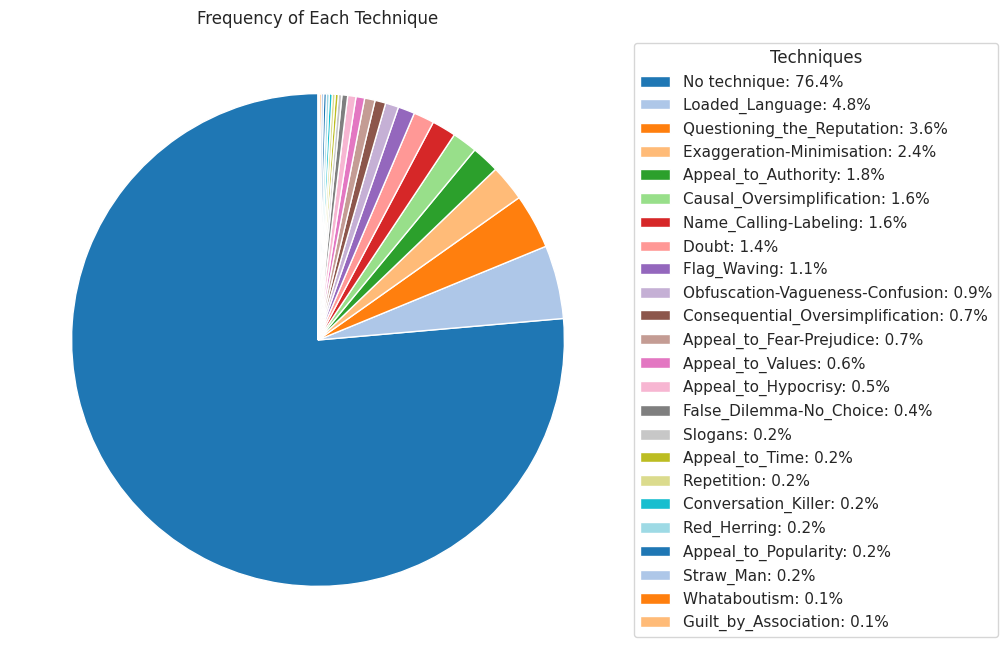

In [65]:
import matplotlib.pyplot as plt

# Calculate percentages for each tag
tag_percentages = 100 * tag_counts / tag_counts.sum()

# Plotting
plt.figure(figsize=(10, 8))
# Create the pie chart
pie_wedges = plt.pie(tag_counts, startangle=90, colors=plt.cm.tab20.colors[:len(tag_counts)])
plt.title('Frequency of Each Technique')

# Generate labels with percentages for the legend
labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(tag_counts.index, tag_percentages)]

# Add a legend outside the chart with percentages
plt.legend(pie_wedges[0], labels, title="Techniques", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('technique_frequency_pie_chart.png', bbox_inches='tight')
plt.show()

In [66]:
train.head(5)

,type,has_technique,text_length,tag,token
0,tweet,True,50,"[B-Appeal_to_Fear-Prejudice, I-Appeal_to_Fear-...","[تحذيرات, من, حرب, جديدة, في, حال, فشل, الانتخ..."
1,tweet,False,104,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[رب, اجعل, صباحي, هذا, غائم, بلطفك،, لا, شر, ف..."
2,tweet,True,103,"[O, O, B-Name_Calling-Labeling, I-Name_Calling...","[#عين_اليمن, #26سبتمبر, ثورة, شعب, صنعت, تاريخ..."
3,tweet,True,86,"[O, O, O, O, O, B-Loaded_Language, O, O, O, B-...","[الحرب, على, #سورية, |, حملات, تظليل, مستمرة, ..."
4,tweet,True,76,"[O, O, O, O, O, O, B-Name_Calling-Labeling, I-...","[📣, New, Podcast!, ""مزيج, الخبرة, والشباب.., خ..."


In [68]:
train = train.drop(['has_technique', 'text_length'], axis=1)

In [70]:
dev = dev.drop(['has_technique', 'text_length'], axis=1)

In [71]:
train.to_csv('train_preprocessed.csv', index=False)
dev.to_csv('dev_preprocessed.csv', index=False)